### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import csv

# Reading CSV file using pandas
df = pd.read_csv('stroopdata.csv')

print("Congruent size: {}, Incongruent size: {}".format( df['Congruent'].size, df['Incongruent'].size))
df.head()

Congruent size: 24, Incongruent size: 24


,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


(1) What is the independent variable? What is the dependent variable?

>**Independent variable:** The congruency of the colour and text, Congruent	& Incongruent. <br>
**Dependent variable** Duration (time in seconds) to recognise the colours or the texts.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

>We will use **Dependent t-test for paired samples**, it is used to compare the means of two related groups to determine whether there is a statistically significant difference between these means. The dependent t-test can look for "differences" between means when participants are measured on the same dependent variable (time) under two different conditions (Congruent & Incongruent). The major advantage of choosing dependent t-test is to eliminate the individual differences that occur between participants. We assume that the data inside each of the samples are normal, not just that the means of the samples are normal.

>**Null-hypothesis:** $ H_0: µ_{Congruent} = µ_{Incongruent} $
<br>There is no difference in time between Congruent & Incongruent, Word condition has no influence on the time. 
<br>**Alternative-hypothesis:** $ H_1: µ_{Congruent} \neq µ_{Incongruent} $
<br>There is a difference in time between Congruent & Incongruent, Incongruent takes more time than Congruent.

>**Where,**
<br>$µ_{Congruent}$ = Population mean for congruent task time.
<br>$µ_{Incongruent}$ = Population mean for incongruent task time.
<br>N = number of participants, 24

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
print("\nMeasures of central tendency:")

print("1. Mean: ")
print(df.mean(axis=0))

print("\n2. Median: ")
print(df.median(axis=0))

print("\n3. Mode: ")
print(df.mode())

print("\nMeasures of variability:")
print("1. Standard Deviation: ")
print(df.std(axis=0))

print("\n2. Variance: ")
print(df.var(axis=0))


Measures of central tendency:
1. Mean: 
Congruent      14.051125
Incongruent    22.015917
dtype: float64

2. Median: 
Congruent      14.3565
Incongruent    21.0175
dtype: float64

3. Mode: 
    Congruent  Incongruent
0       8.630       15.687
1       8.987       17.394
2       9.401       17.425
3       9.564       17.510
4      10.639       17.960
5      11.344       18.644
6      12.079       18.741
7      12.130       19.278
8      12.238       20.330
9      12.369       20.429
10     12.944       20.762
11     14.233       20.878
12     14.480       21.157
13     14.669       21.214
14     14.692       22.058
15     15.073       22.158
16     15.298       22.803
17     16.004       23.894
18     16.791       24.524
19     16.929       24.572
20     18.200       25.139
21     18.495       26.282
22     19.710       34.288
23     22.328       35.255

Measures of variability:
1. Standard Deviation: 
Congruent      3.559358
Incongruent    4.797057
dtype: float64

2. Variance: 
Congru

>From the results, we can see that Incongruent takes more time than Congruent depending on the measures that were provided above.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

C:\Users\Khalid\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


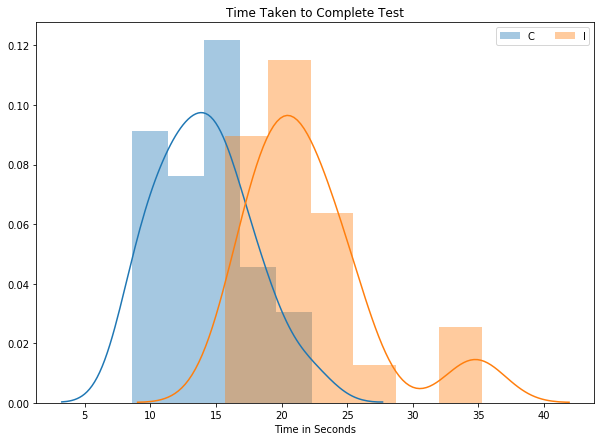

In [3]:
plt.figure(figsize=[10, 7])
sns.distplot(df['Congruent'])
sns.distplot(df['Incongruent'])
plt.xlabel('Time in Seconds')
plt.legend('CI', ncol=2, loc='upper right');
plt.title('Time Taken to Complete Test'); 

>From the visualization, we can say that both distribution are slightly normal. For the Congruent, the most time spent is around 15 seconds. For the Incongruent, the most time spent is around 22 seconds. Therefore, we can say that Incongruent takes more time than Congruent.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

**Step 1:** Initialize values:

>$ H_0: µ_{Congruent} = µ_{Incongruent} $ <br>
$ H_1: µ_{Congruent} \neq µ_{Incongruent} $
<br><br>
N = number of participants = 24 <br>
Degree of freedom = N - 1 = 24 - 1 = 23. <br>
Alpha =  5% (0.05) the most common one. <br>
T-Value (two-tailed) =  +/- 2.068658

**Step 2:** Find T-Statistic value:

In [4]:
alpha = 0.05
tcrit = 2.068658
tstas, pval = stats.ttest_rel(df['Incongruent'], df['Congruent'], axis=0)
print("T-Statistic value = "+ str(round(tstas,4)))
print("P-Value = "+ str(round(pval,4)))

T-Statistic value = 8.0207
P-Value = 0.0


In [5]:
print("P-Value < Alpha? " + str(pval<alpha))
print("T-Value < T-Statistic? " + str(tcrit<tstas))

P-Value < Alpha? True
T-Value < T-Statistic? True


>**Reject the null hypothesis** and accept that the alternative is true. There is a significant difference in time between Congruent & Incongruent, Incongruent takes more time than Congruent.

### Resources

1. Udacity videos
2. Stack Overflow
3. http://pandas.pydata.org/pandas-docs/stable/api.html
4. https://www.statisticshowto.datasciencecentral.com/t-critical-value/
5. https://www.americannursetoday.com/the-p-value-what-it-really-means/
6. https://statistics.laerd.com/statistical-guides/dependent-t-test-statistical-guide.php
7. http://www2.psychology.uiowa.edu/faculty/mordkoff/GradStats/part%201/I.07%20normal.pdf
8. https://goodcalculators.com/student-t-value-calculator/